In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn import datasets
from typing import Tuple, Dict, List, Union
%matplotlib inline

#### 2) Implemente o Elbow method para definir o número de clusters de uma dada amostra. Você pode partir do código disponível no EAD.

##### Vou me basear no exercício 8.8 e montar clusters com 5 iterações para K entre 2 até 8.

In [2]:
def inicialize_centroids(K):
    random_centroids = []
    for _ in range(K):
        random_centroids.append([4 * np.random.random_sample(size=None) - 2, 5 * np.random.sample(size=None) - 5])
    return np.array(random_centroids)

In [3]:
def adjust_data(data, P):
    new_data = []
    for p in range(P):
        new_data.append(data[:, p])
    return np.array(new_data)

In [4]:
def assign_points(centroids: np.ndarray, X: np.ndarray) -> List[Union[np.ndarray, List[np.ndarray]]]:    
    
    assignments = [[c, []] for c in centroids]

    for x_p in X:
        smallest_distance = np.linalg.norm(x_p - centroids[0])
        centroid_assignment = centroids[0]

        for c in centroids:
            distance = np.linalg.norm(x_p - c)
            # print("Distância calculada:", distance)
            if distance < smallest_distance:
                smallest_distance = distance
                centroid_assignment = c
        
        # print("Ponto: {}\nCentróide designado: {}\nDistância: {}\n".format(x_p, centroid_assignment, smallest_distance))
        
        for a in assignments:
            if np.array_equal(a[0], centroid_assignment):
                a[1].append(x_p)
                break

    return assignments

In [5]:
def recalculate_clusters_centroids(clusters: List[Union[np.ndarray, List[np.ndarray]]]) -> np.ndarray: 

    def get_mean(points: List[np.ndarray]) -> np.ndarray:
        qnt = len(points)
        ss = np.zeros(points[0].shape[0])
        for x_p in points:
            ss += x_p
        return ss / qnt

    new_centroids = []

    for i, c in enumerate(clusters):
        centroid, cluster_points = c
        if len(cluster_points) == 0:
            new_centroids.append(centroid)
            continue
        new_c = get_mean(cluster_points)
        new_centroids.append(new_c)

    return new_centroids

In [13]:
def calculate_wcss(clusters: List[Union[np.ndarray, List[np.ndarray]]]) -> float:

    def calculate_distenca_between_vectors(v1: np.ndarray, v2: np.ndarray) -> float:
        assert np.size(v1) == np.size(v2), "Vectors should have same length."
        return np.linalg.norm(v1 - v2)
      
    wcss = 0
    points = []

    for cluster in clusters:
        centroid, points = cluster
        for point in points:
            distance = calculate_distenca_between_vectors(point, centroid) ** 2
            wcss += distance

    return wcss




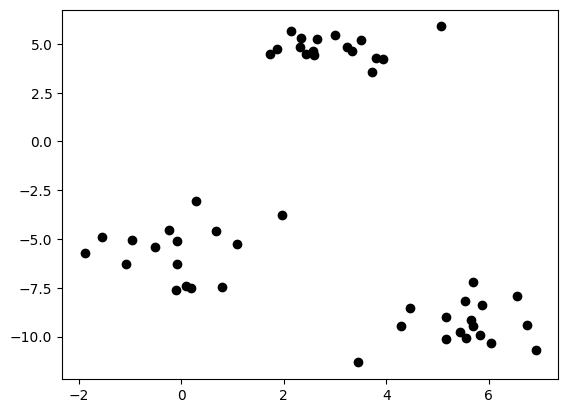

In [14]:
# Loading the data
P = 50 # Number of data points
blobs = datasets.make_blobs(n_samples=P, centers=3, random_state=10)
data = np.transpose(blobs[0])

# scatter plot the dataset 
plt.scatter(data[0,:],data[1,:],c = 'k')
plt.show();

--------
Resultados finais:
 {1: 2178.7277226188044, 2: 465.46180845056574, 3: 91.004746820332, 4: 71.90031190869348, 5: 73.79225806091598, 6: 60.97618399648228, 7: 63.06106180759044, 8: 71.90031190869348, 9: 69.23879920581224}


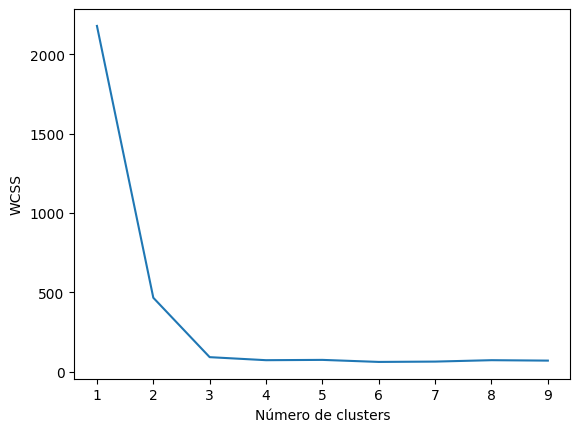

In [16]:
K = 3
N = 2
I = 7

elbow_results = {}

for k_s in range(1, 10):

    adjusted_data = adjust_data(data, P)
    initial_centroids_guess = inicialize_centroids(k_s)
    centroids = initial_centroids_guess

    for i in range(I):
        centroids = initial_centroids_guess if i == 0 else recalculate_clusters_centroids(clusters=clusters);
        clusters = assign_points(centroids=centroids, X=adjusted_data);

    wcss = calculate_wcss(clusters)
    elbow_results[k_s] = wcss

print("--------\nResultados finais:\n", elbow_results)

plt.plot(elbow_results.keys(), elbow_results.values())
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show();